In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# setting figure parameters and style
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='viridis')

# labelencoder is used for encoding categorical data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# importing logistic regression model
from sklearn.linear_model import LogisticRegression

#importing  test train split 
from sklearn.model_selection import train_test_split

# for scaling the data
from sklearn.preprocessing import StandardScaler

# metics to check the performance of the model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score,roc_curve, accuracy_score

In [2]:
# importing dataset
df = pd.read_csv('bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.describe(include = object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.duplicated().sum()

0

<Axes: >

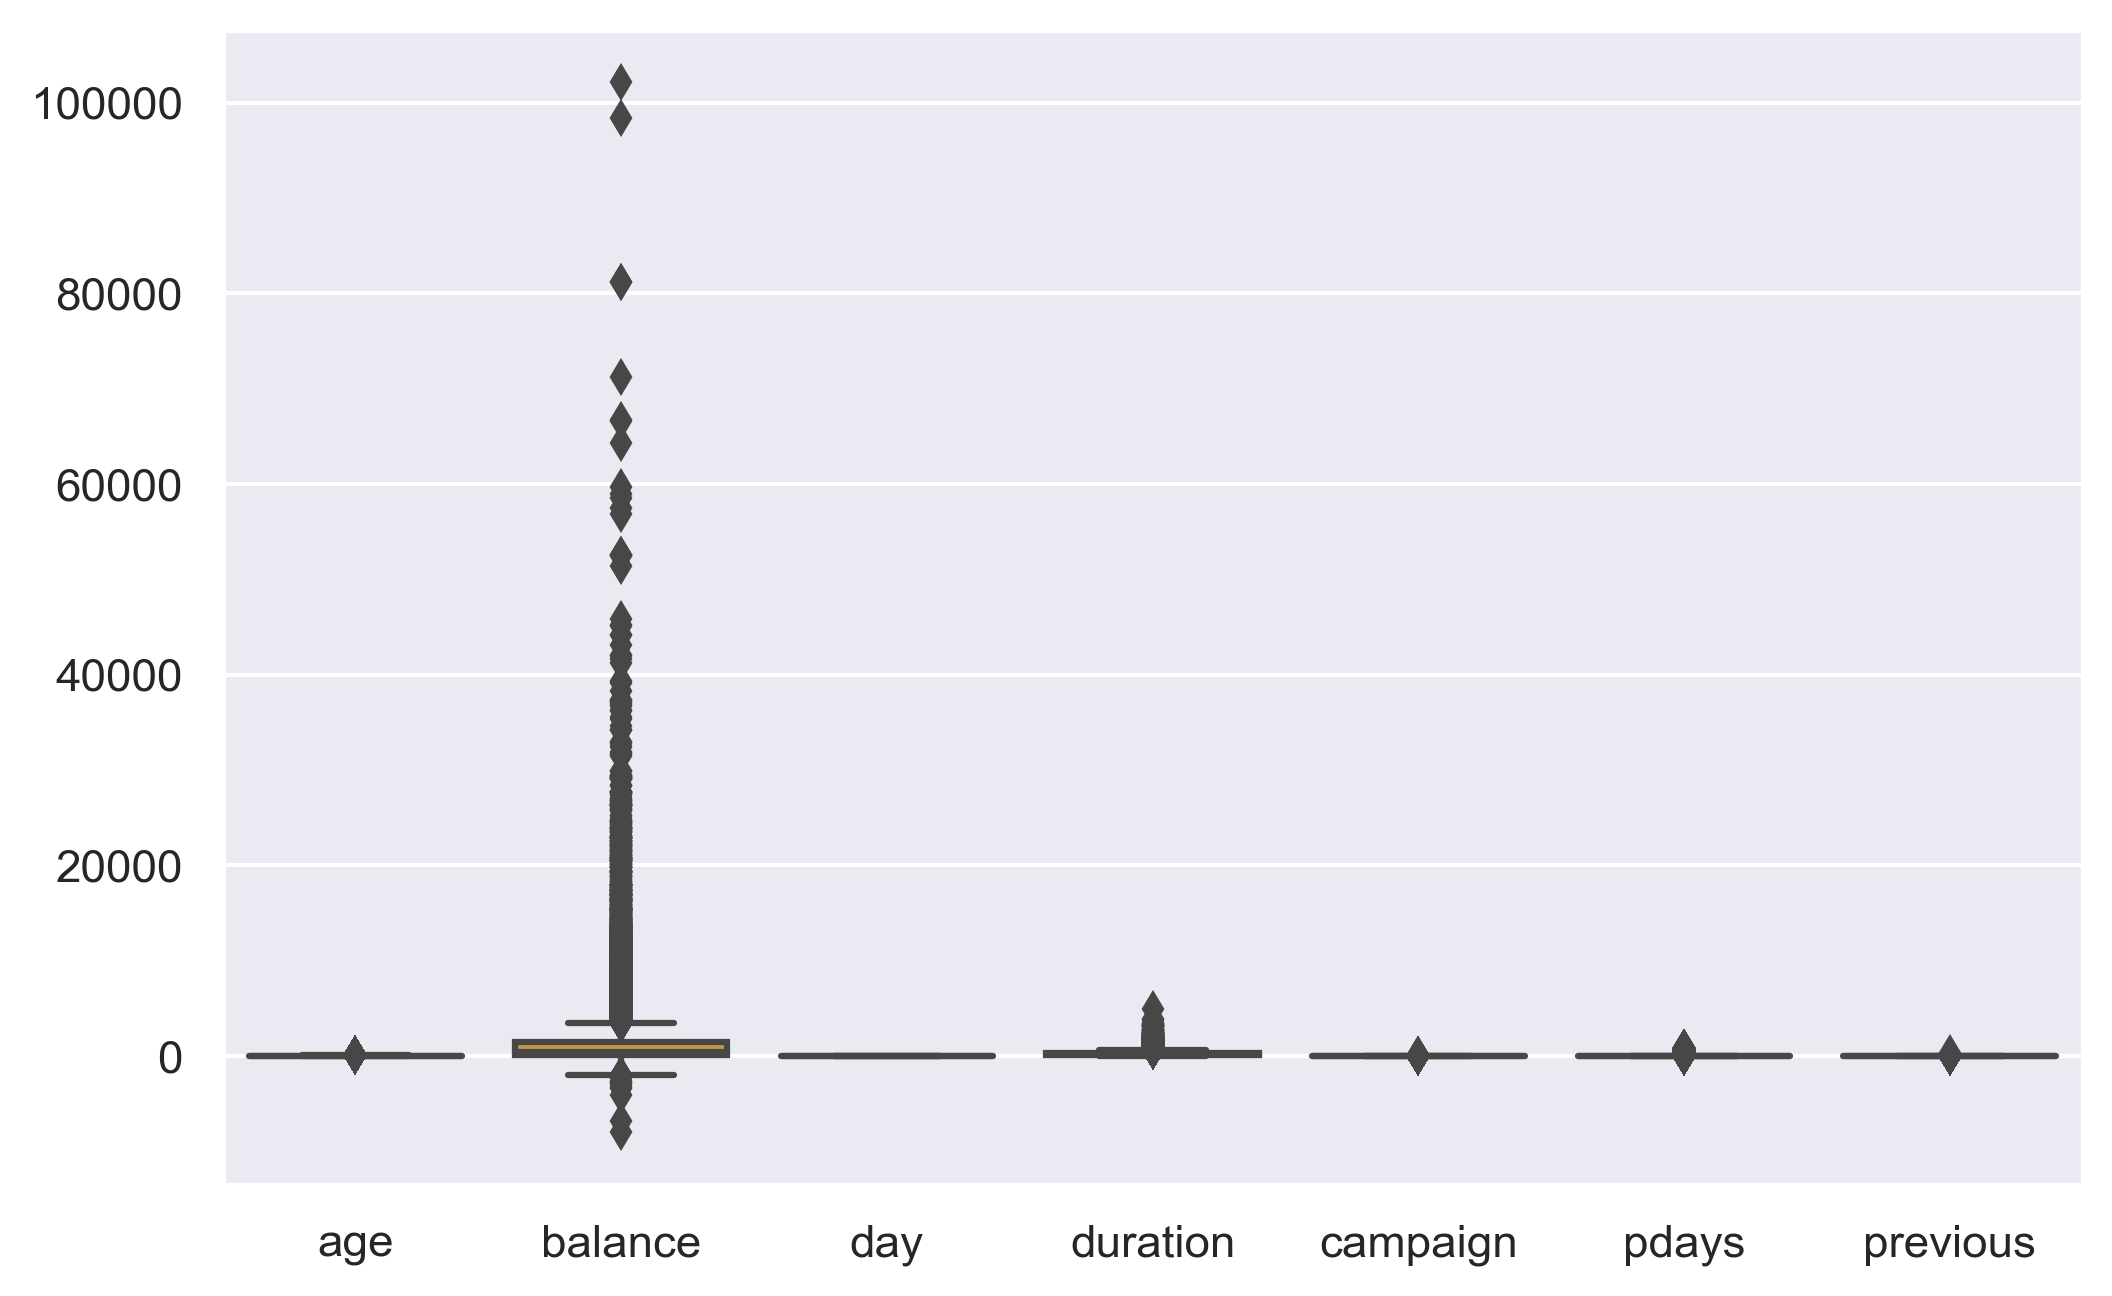

In [8]:
sns.boxplot(df)

<Axes: xlabel='balance', ylabel='y'>

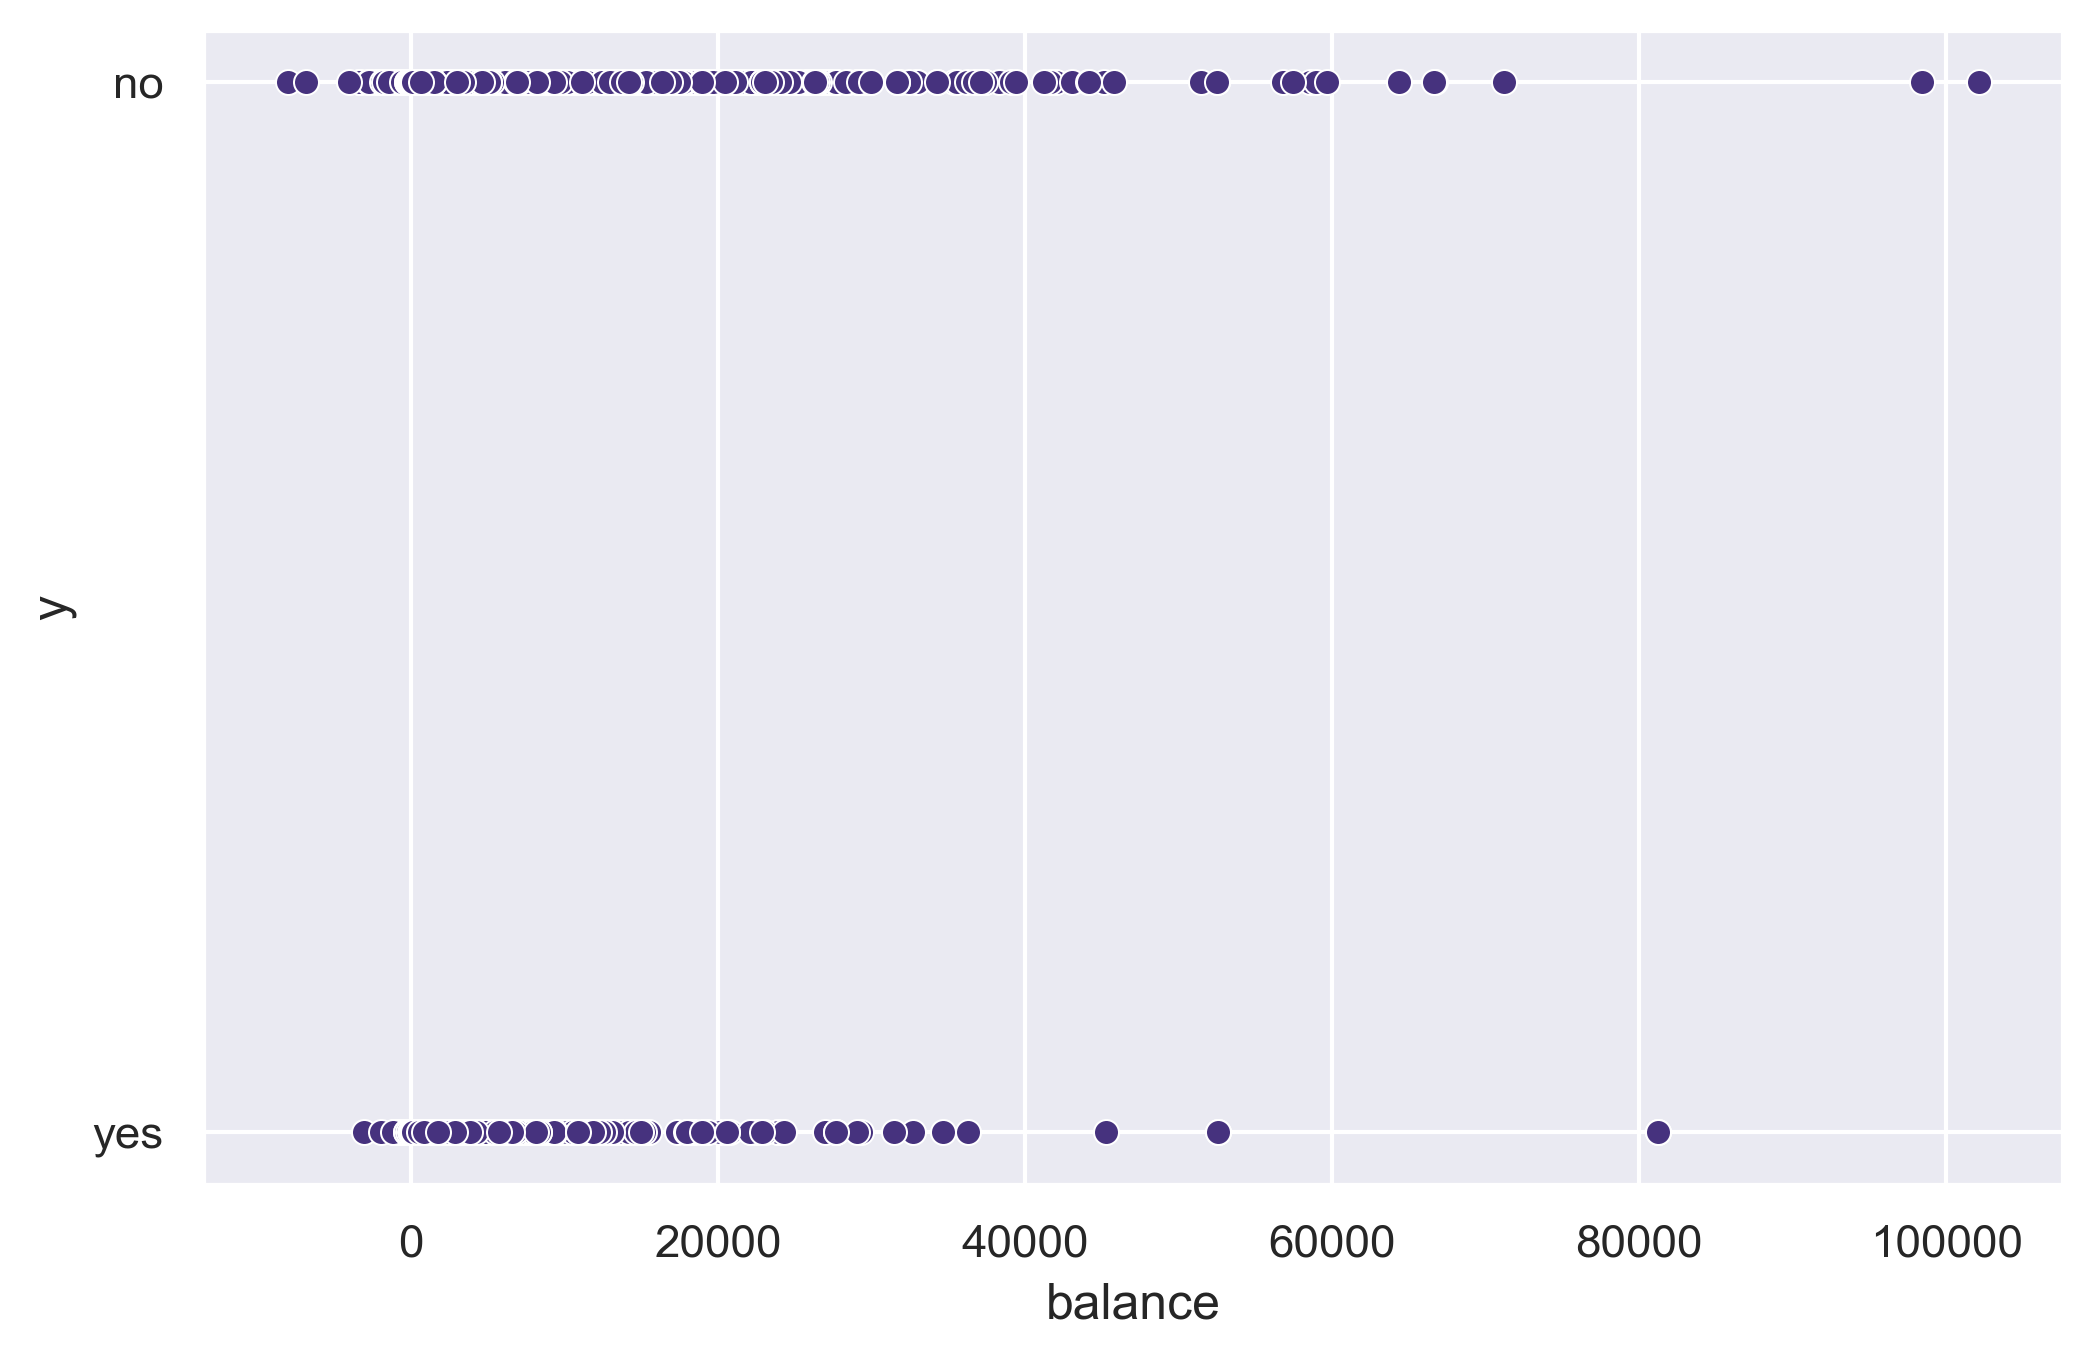

In [9]:
sns.scatterplot(data=df, x='balance', y = 'y')

* As it is bank related data outliers can be helpfull in identifying extreme cases & to build a more robust model

no     39922
yes     5289
Name: y, dtype: int64

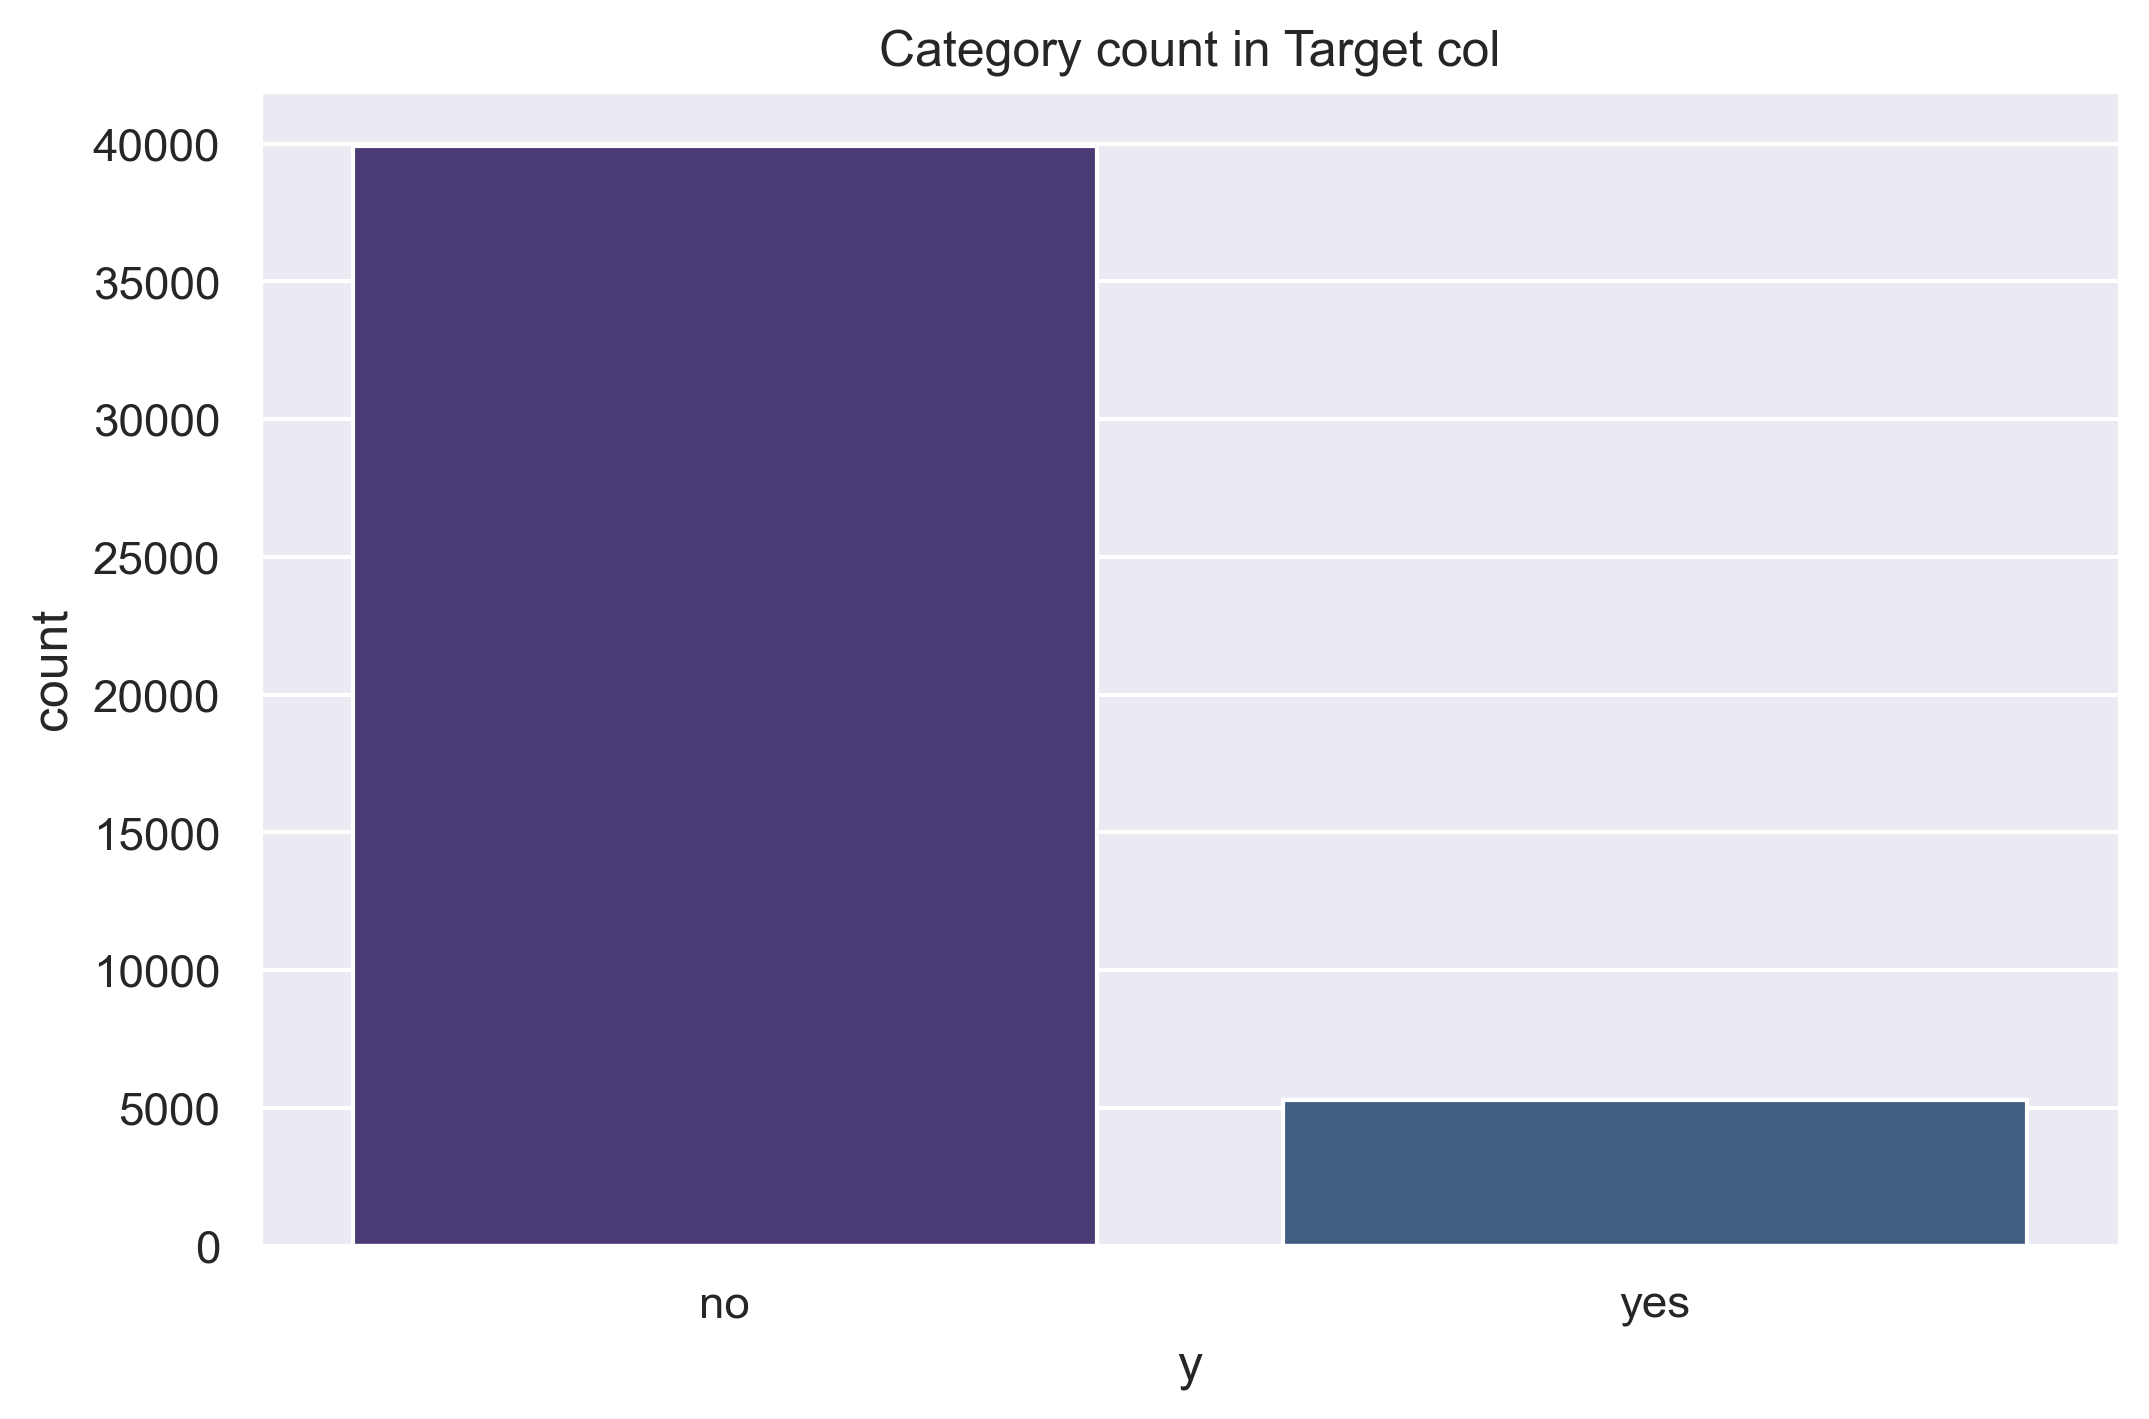

In [10]:
sns.countplot(data = df, x='y')
plt.title('Category count in Target col')

df['y'].value_counts()

* Target data is very imbalanced, this will affect our model's recall & precision score

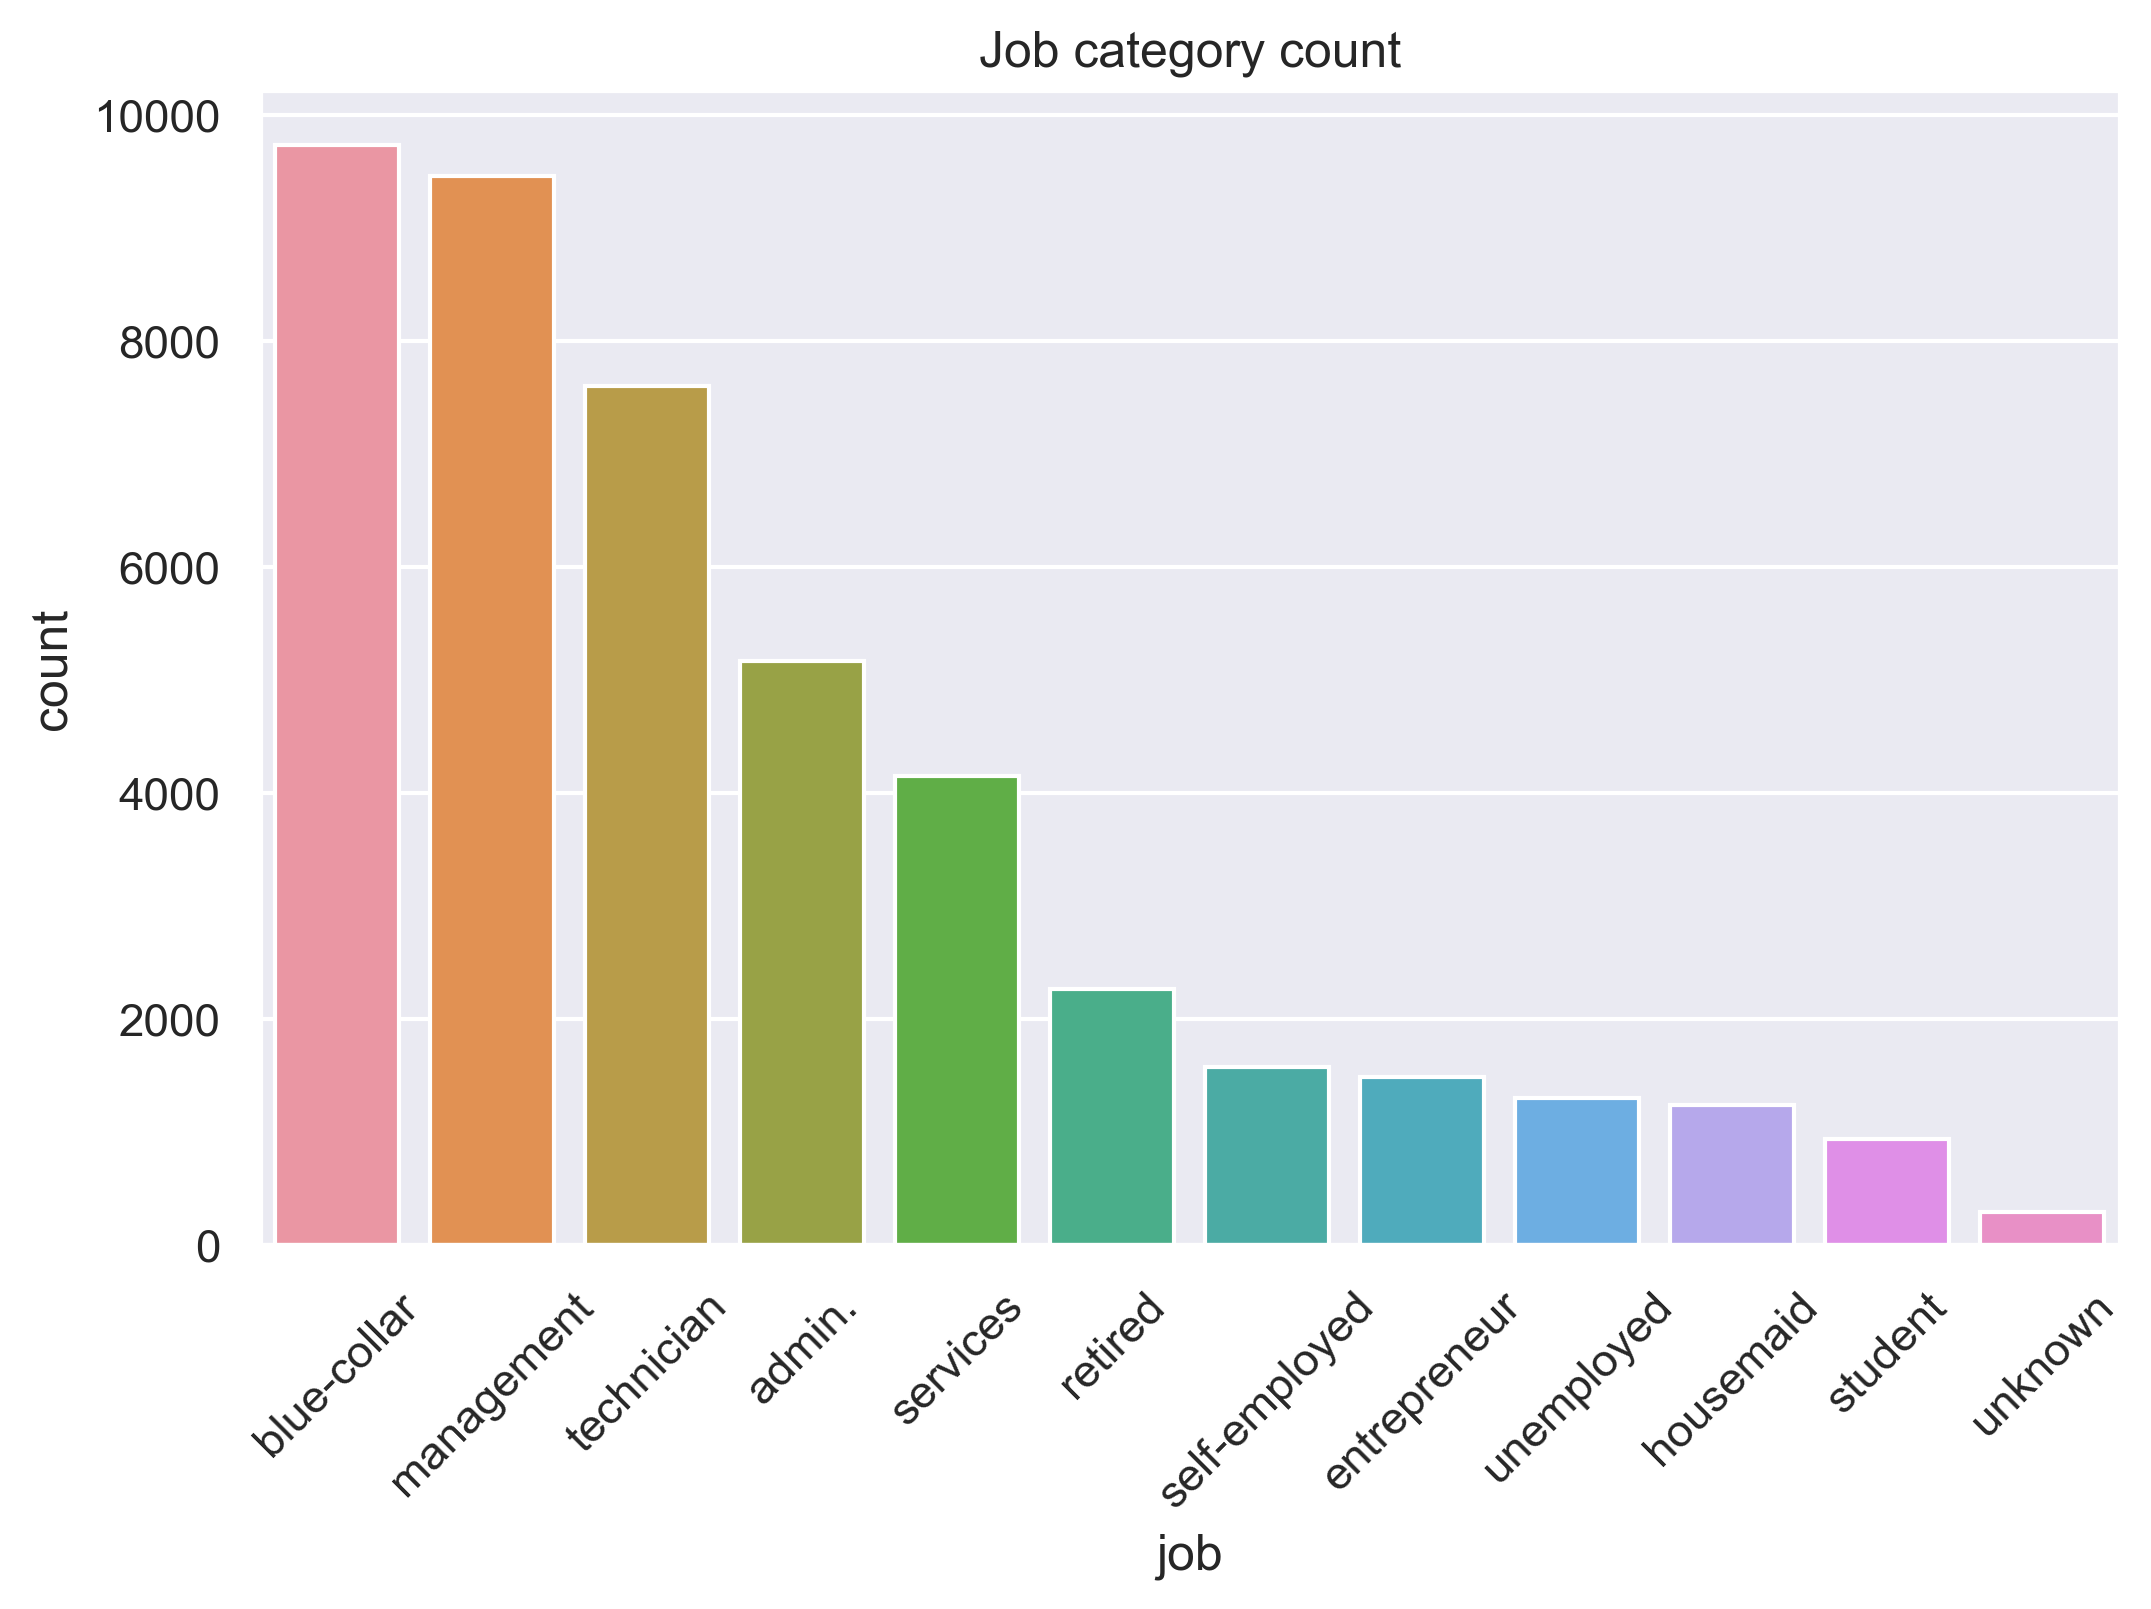

In [11]:
sns.countplot(data=df, x='job', order = df['job'].value_counts().index)
plt.title('Job category count')
plt.xticks(rotation = 45)
plt.show()

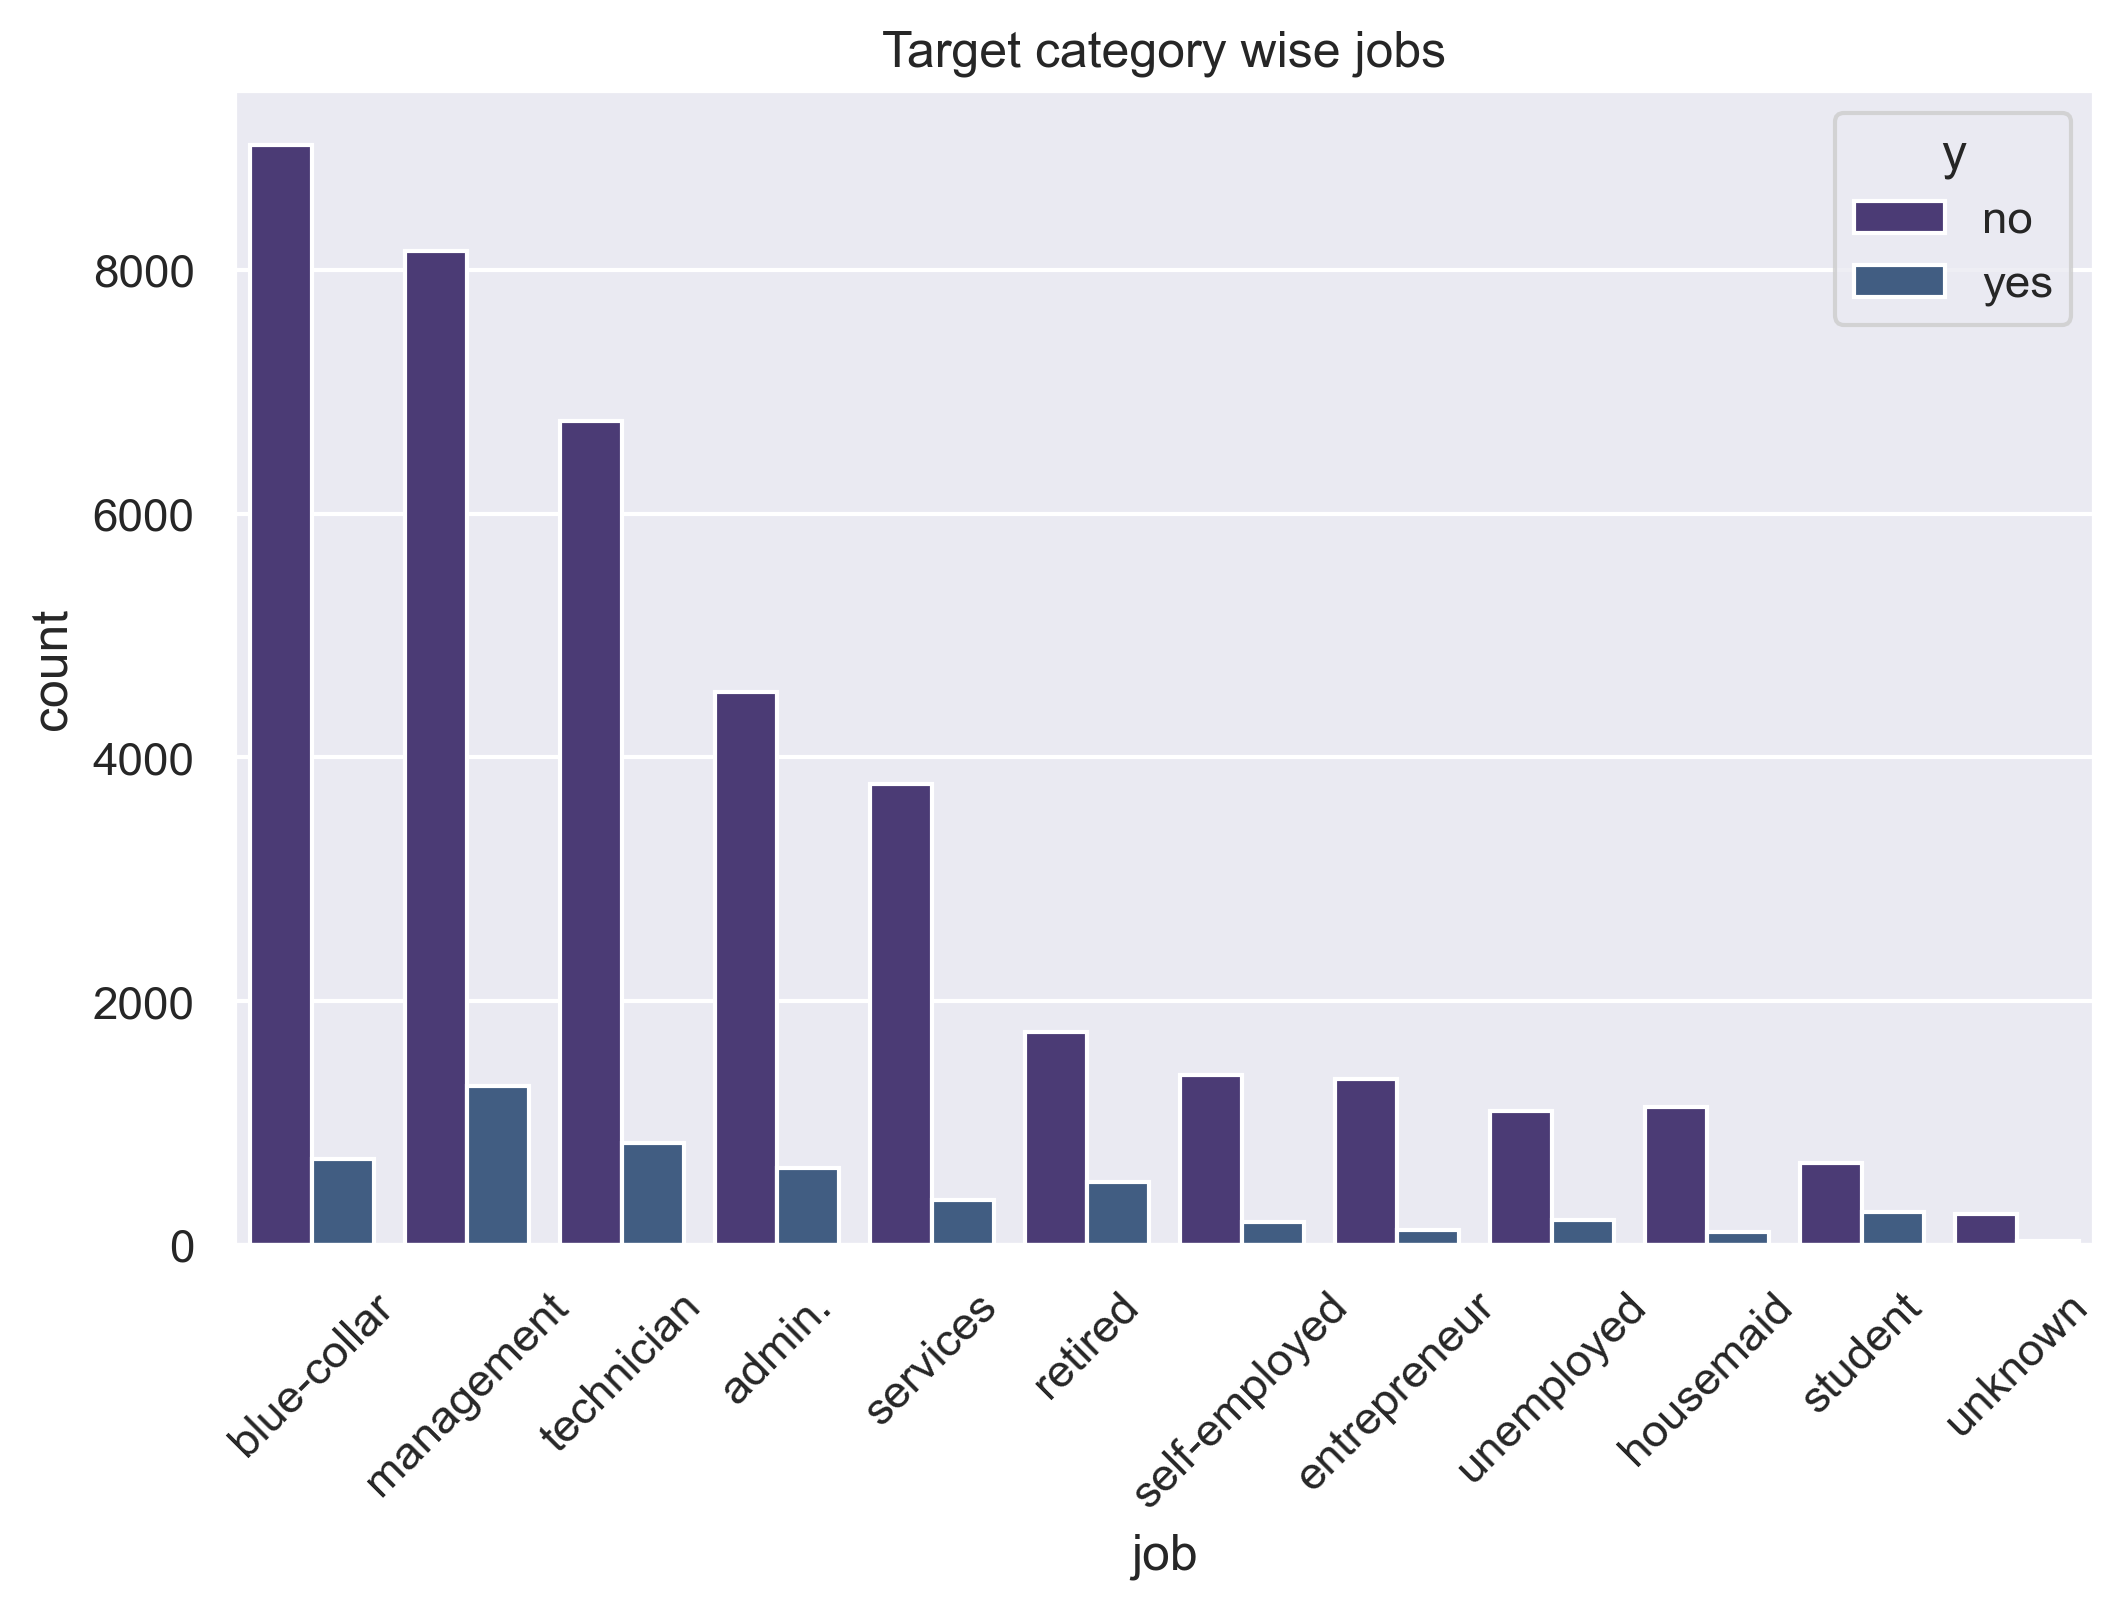

In [12]:
sns.countplot(data = df, x='job', order = df['job'].value_counts().index, hue='y')
plt.xticks(rotation = 45)
plt.title('Target category wise jobs')
plt.show()

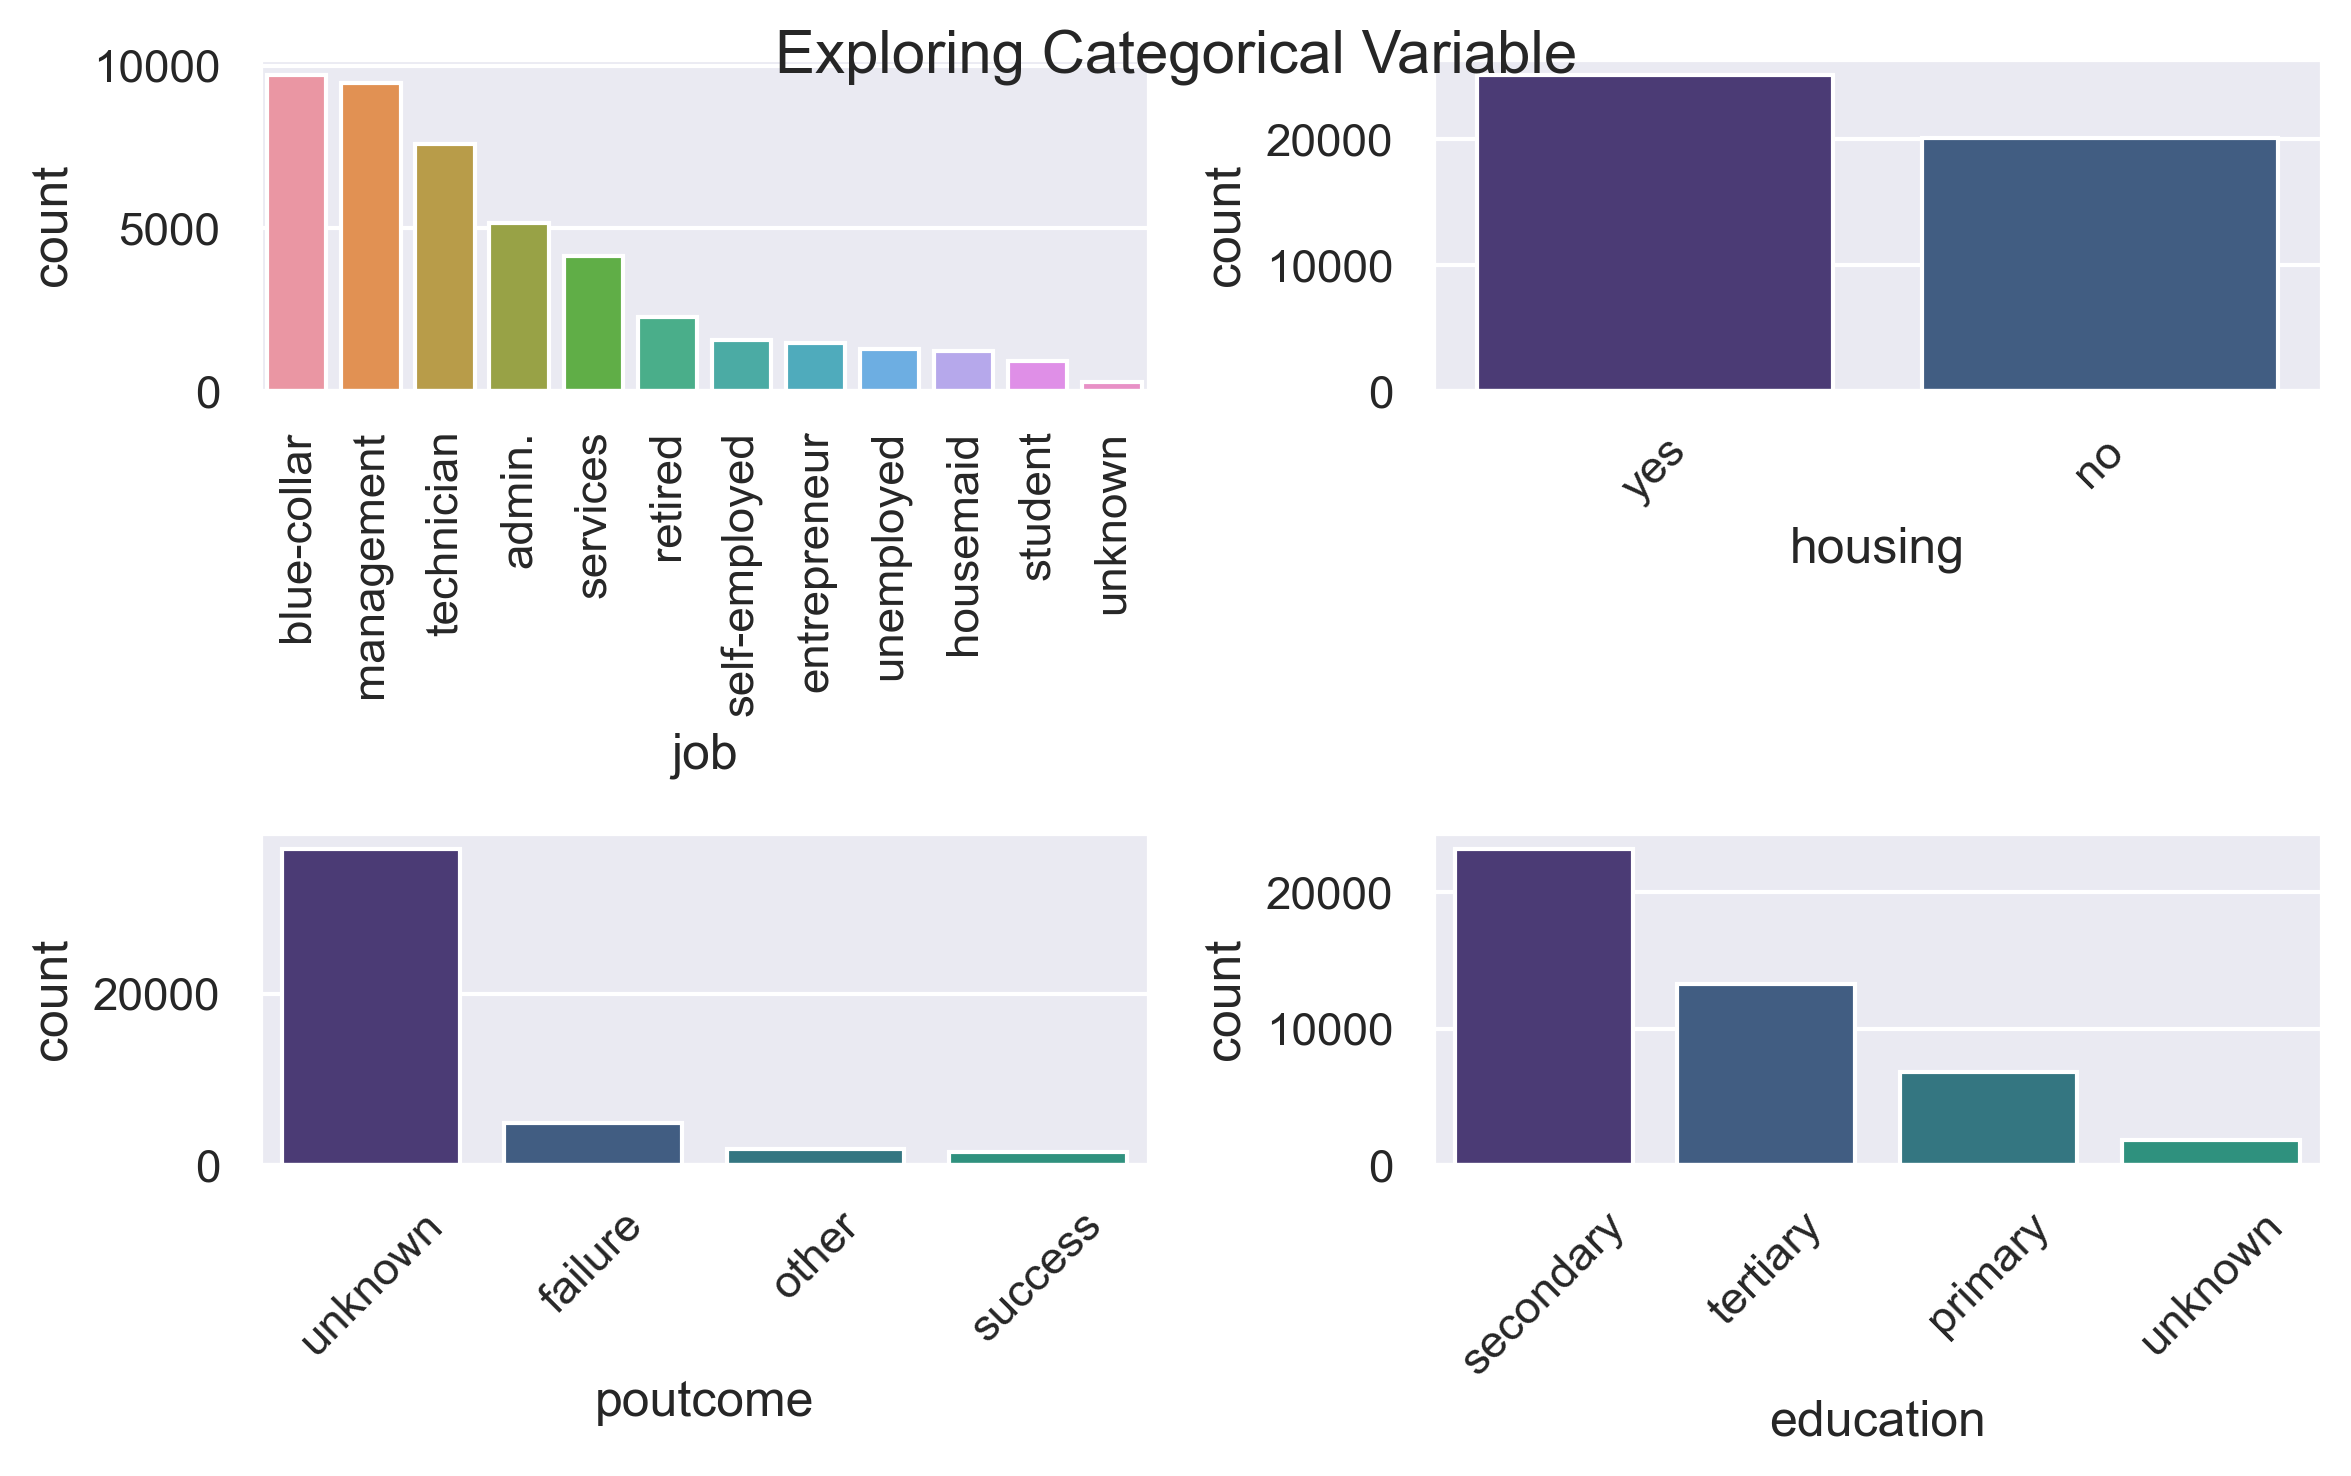

In [13]:
plt.subplot(2,2,1)
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation = 90)
plt.subplot(2,2,2)
sns.countplot(data=df, x='housing', order=df['housing'].value_counts().index)
plt.xticks(rotation = 45)
plt.subplot(2,2,3)
sns.countplot(data = df, x = 'poutcome',order=df['poutcome'].value_counts().index)
plt.xticks(rotation = 45)
plt.subplot(2,2,4)
sns.countplot(data = df, x = 'education', order=df['education'].value_counts().index)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.suptitle('Exploring Categorical Variable')
plt.show()

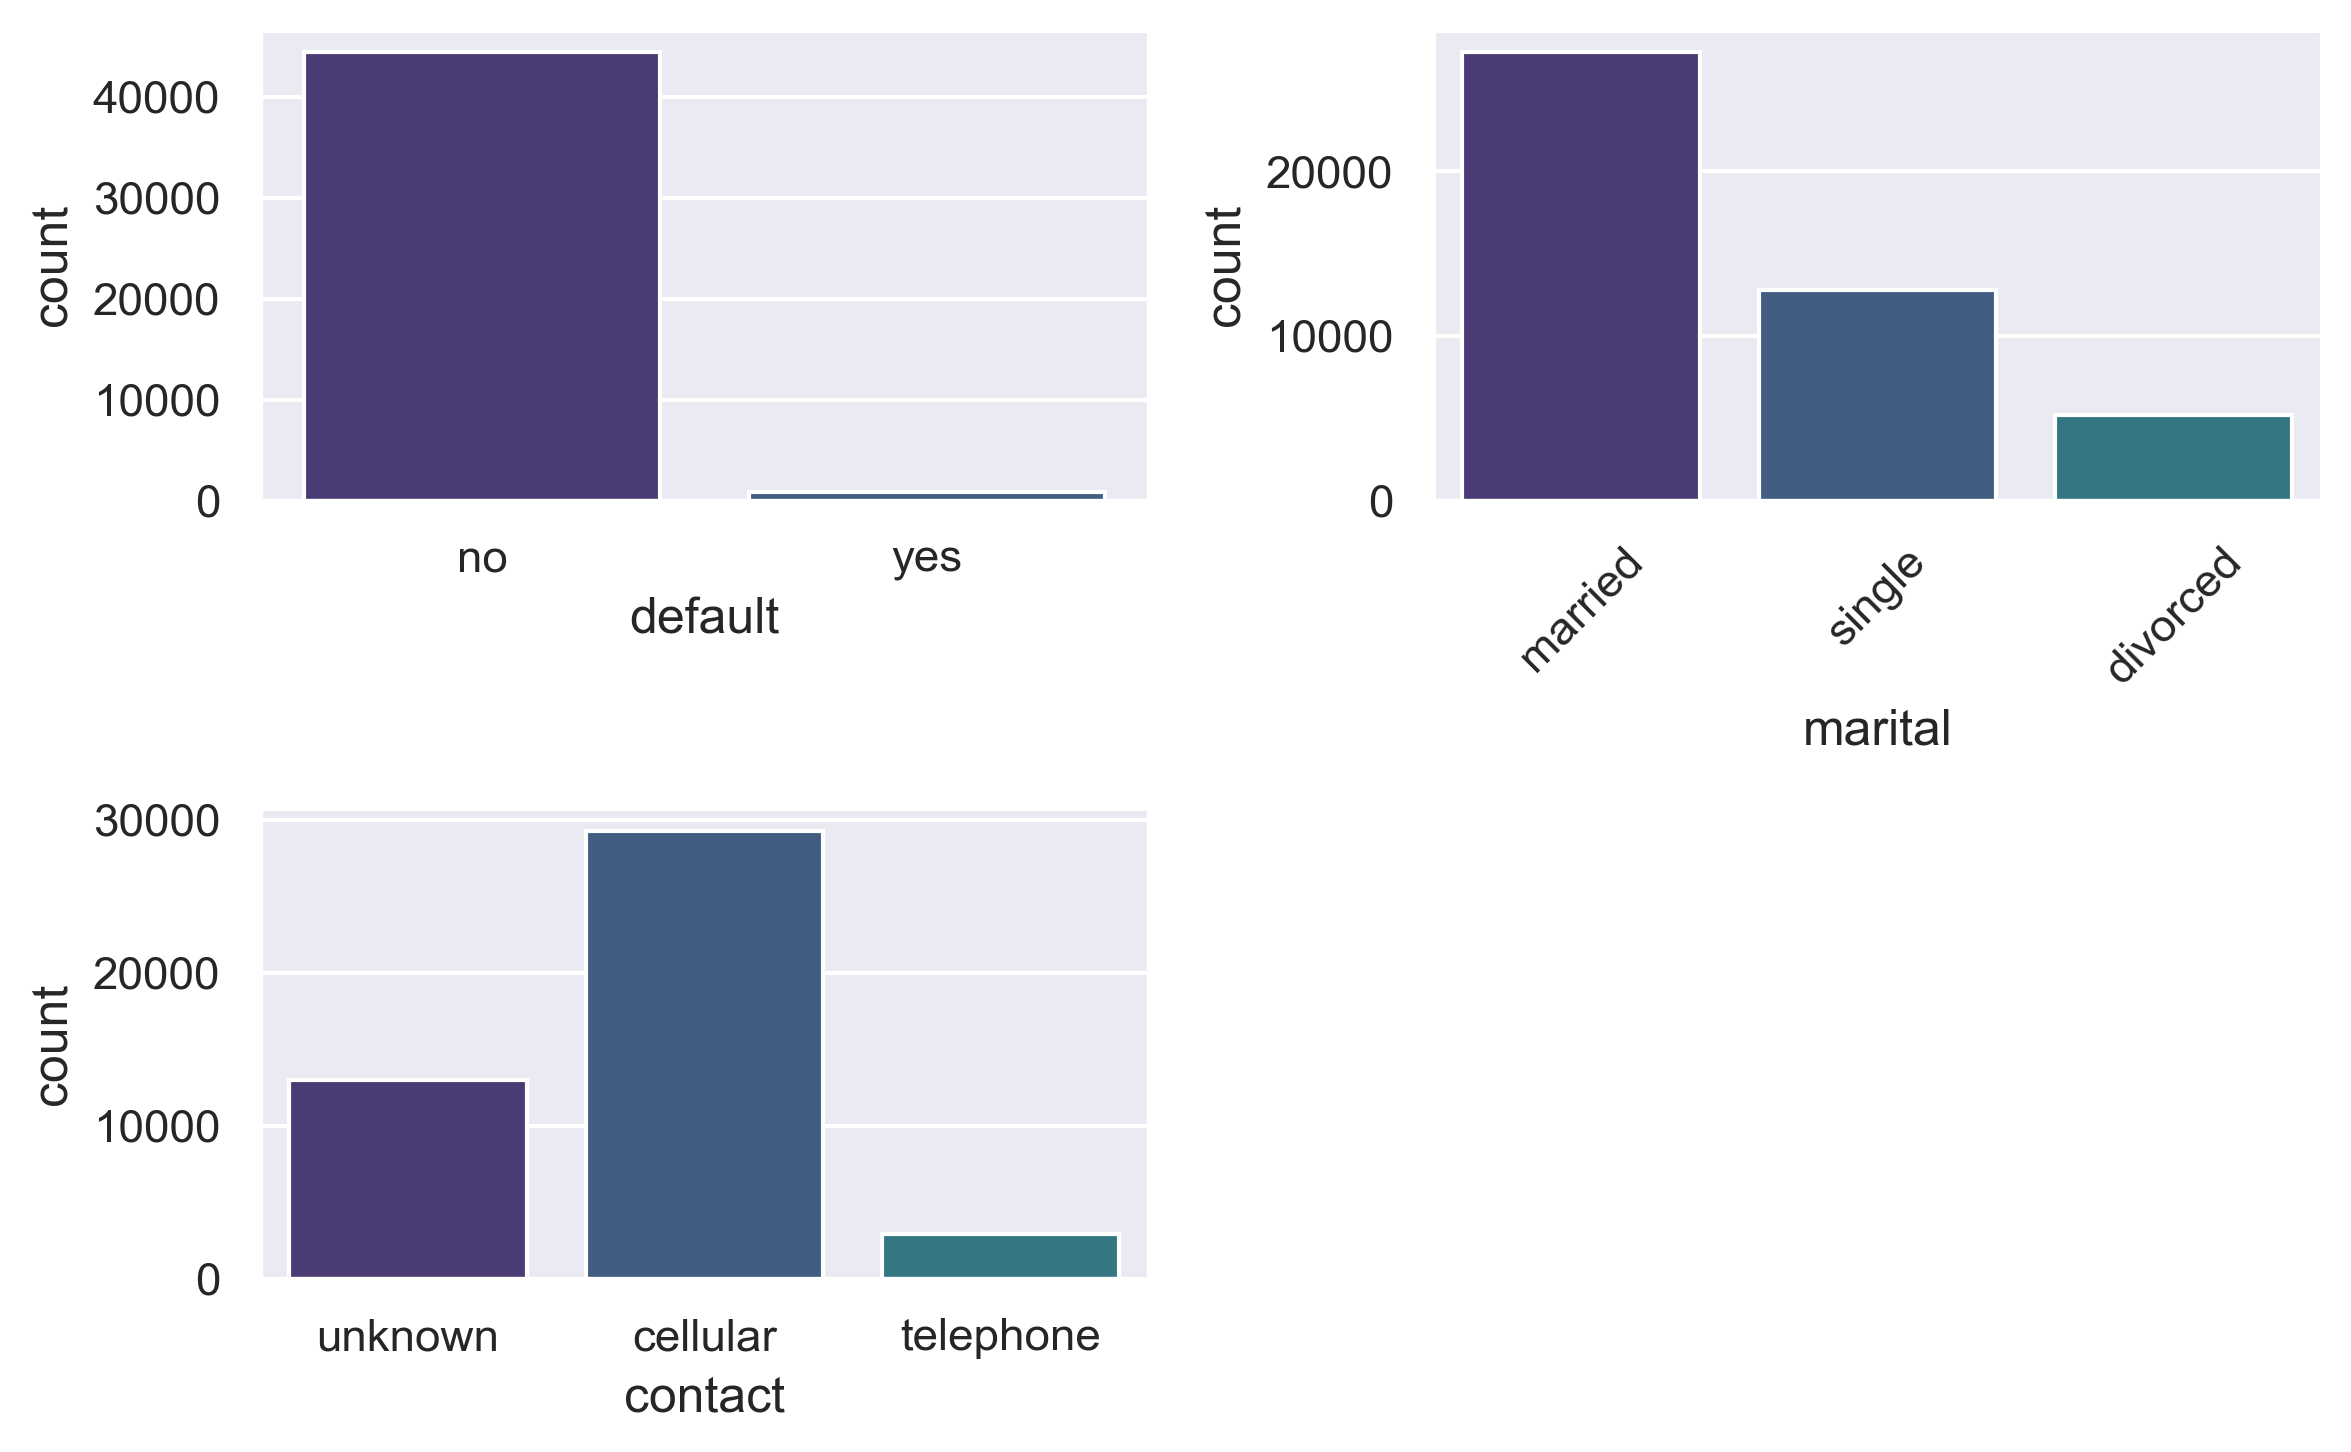

In [14]:
plt.subplot(2,2,1)
sns.countplot(data = df, x = 'default')
plt.subplot(2,2,2)
sns.countplot(data = df, x = 'marital')
plt.xticks(rotation = 45)
plt.subplot(2,2,3)
sns.countplot(data = df, x = 'contact')
plt.tight_layout()

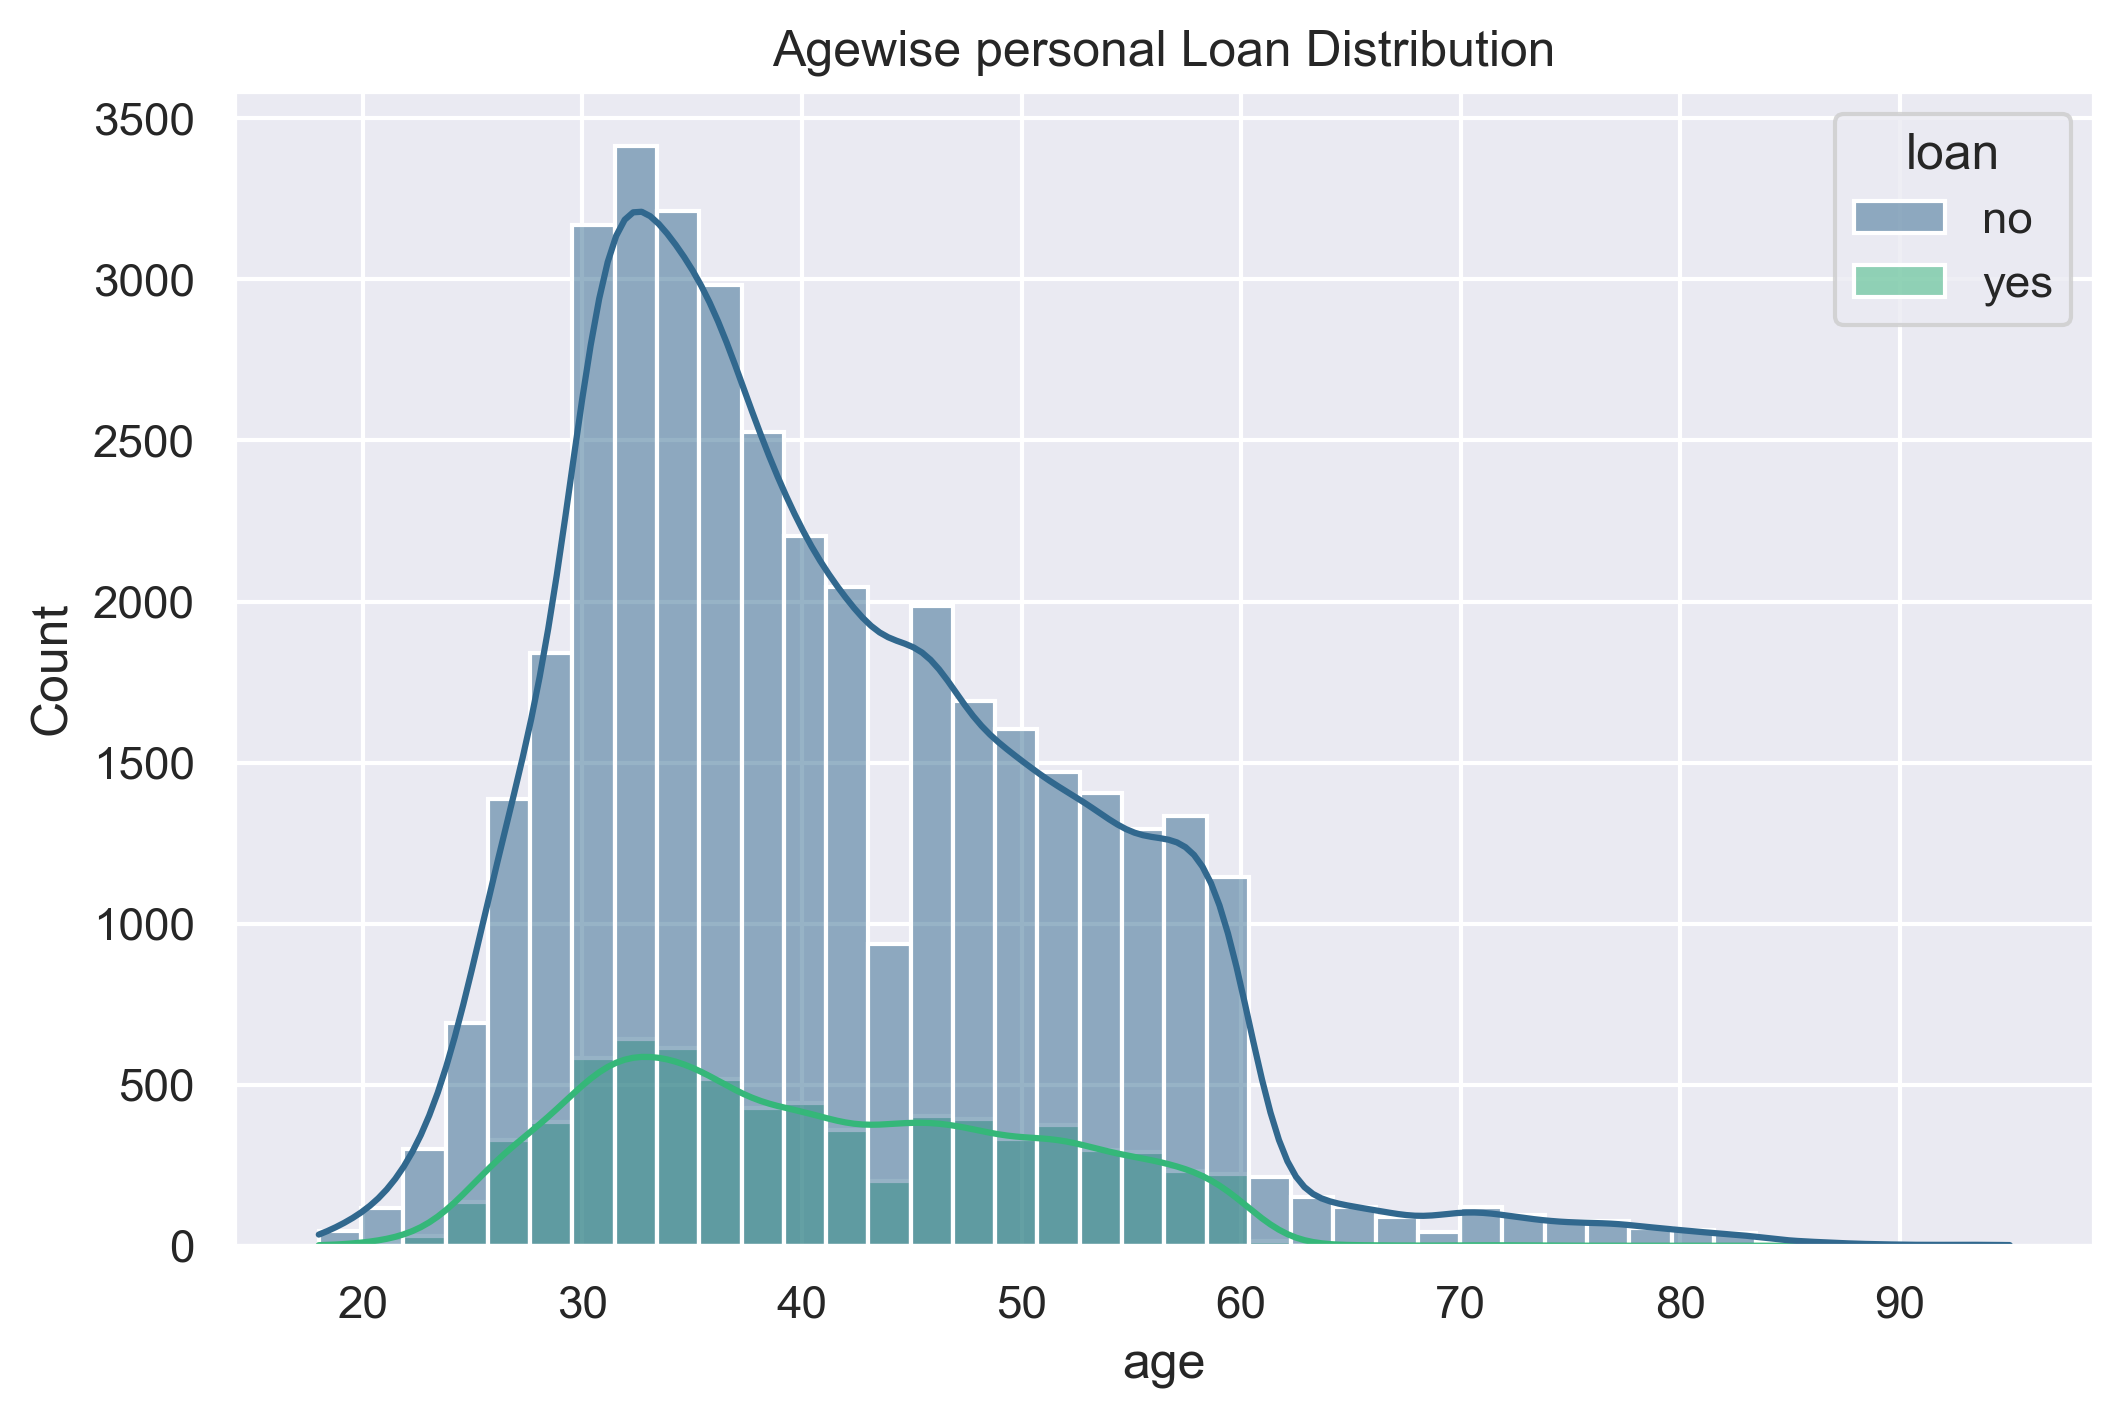

In [15]:
sns.histplot(data = df, x = 'age', bins = 40, hue = 'loan', palette='viridis', kde='TRUE')
plt.title('Agewise personal Loan Distribution')
plt.show()

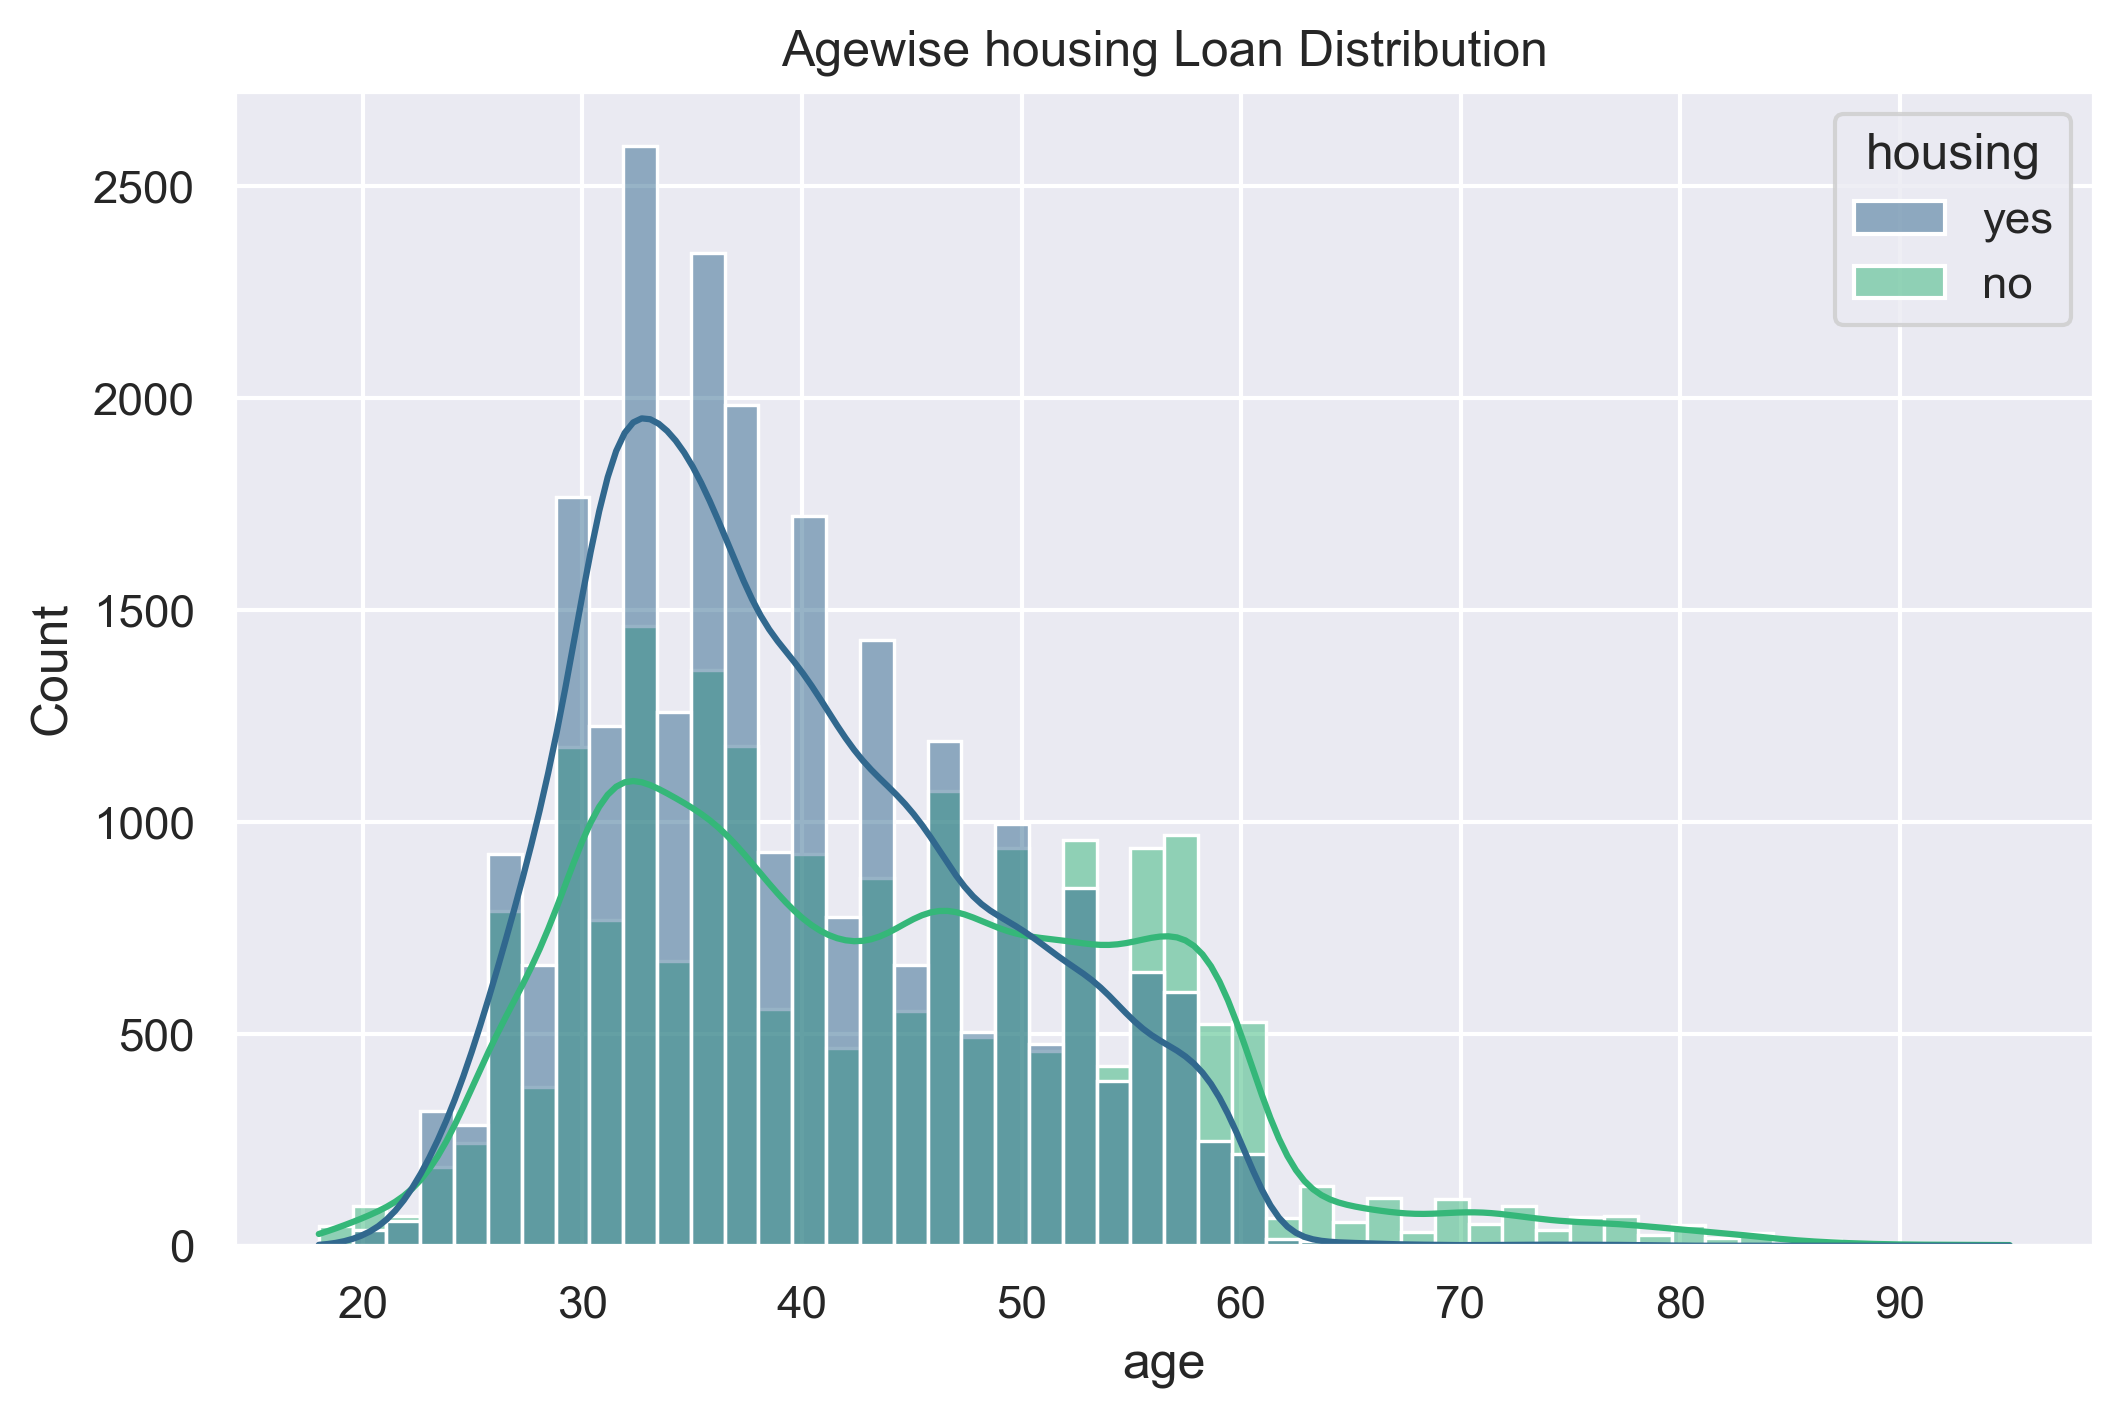

In [16]:
sns.histplot(data = df, x = 'age', bins = 50, hue = 'housing', palette='viridis', kde='TRUE')
plt.title('Agewise housing Loan Distribution')
plt.show()

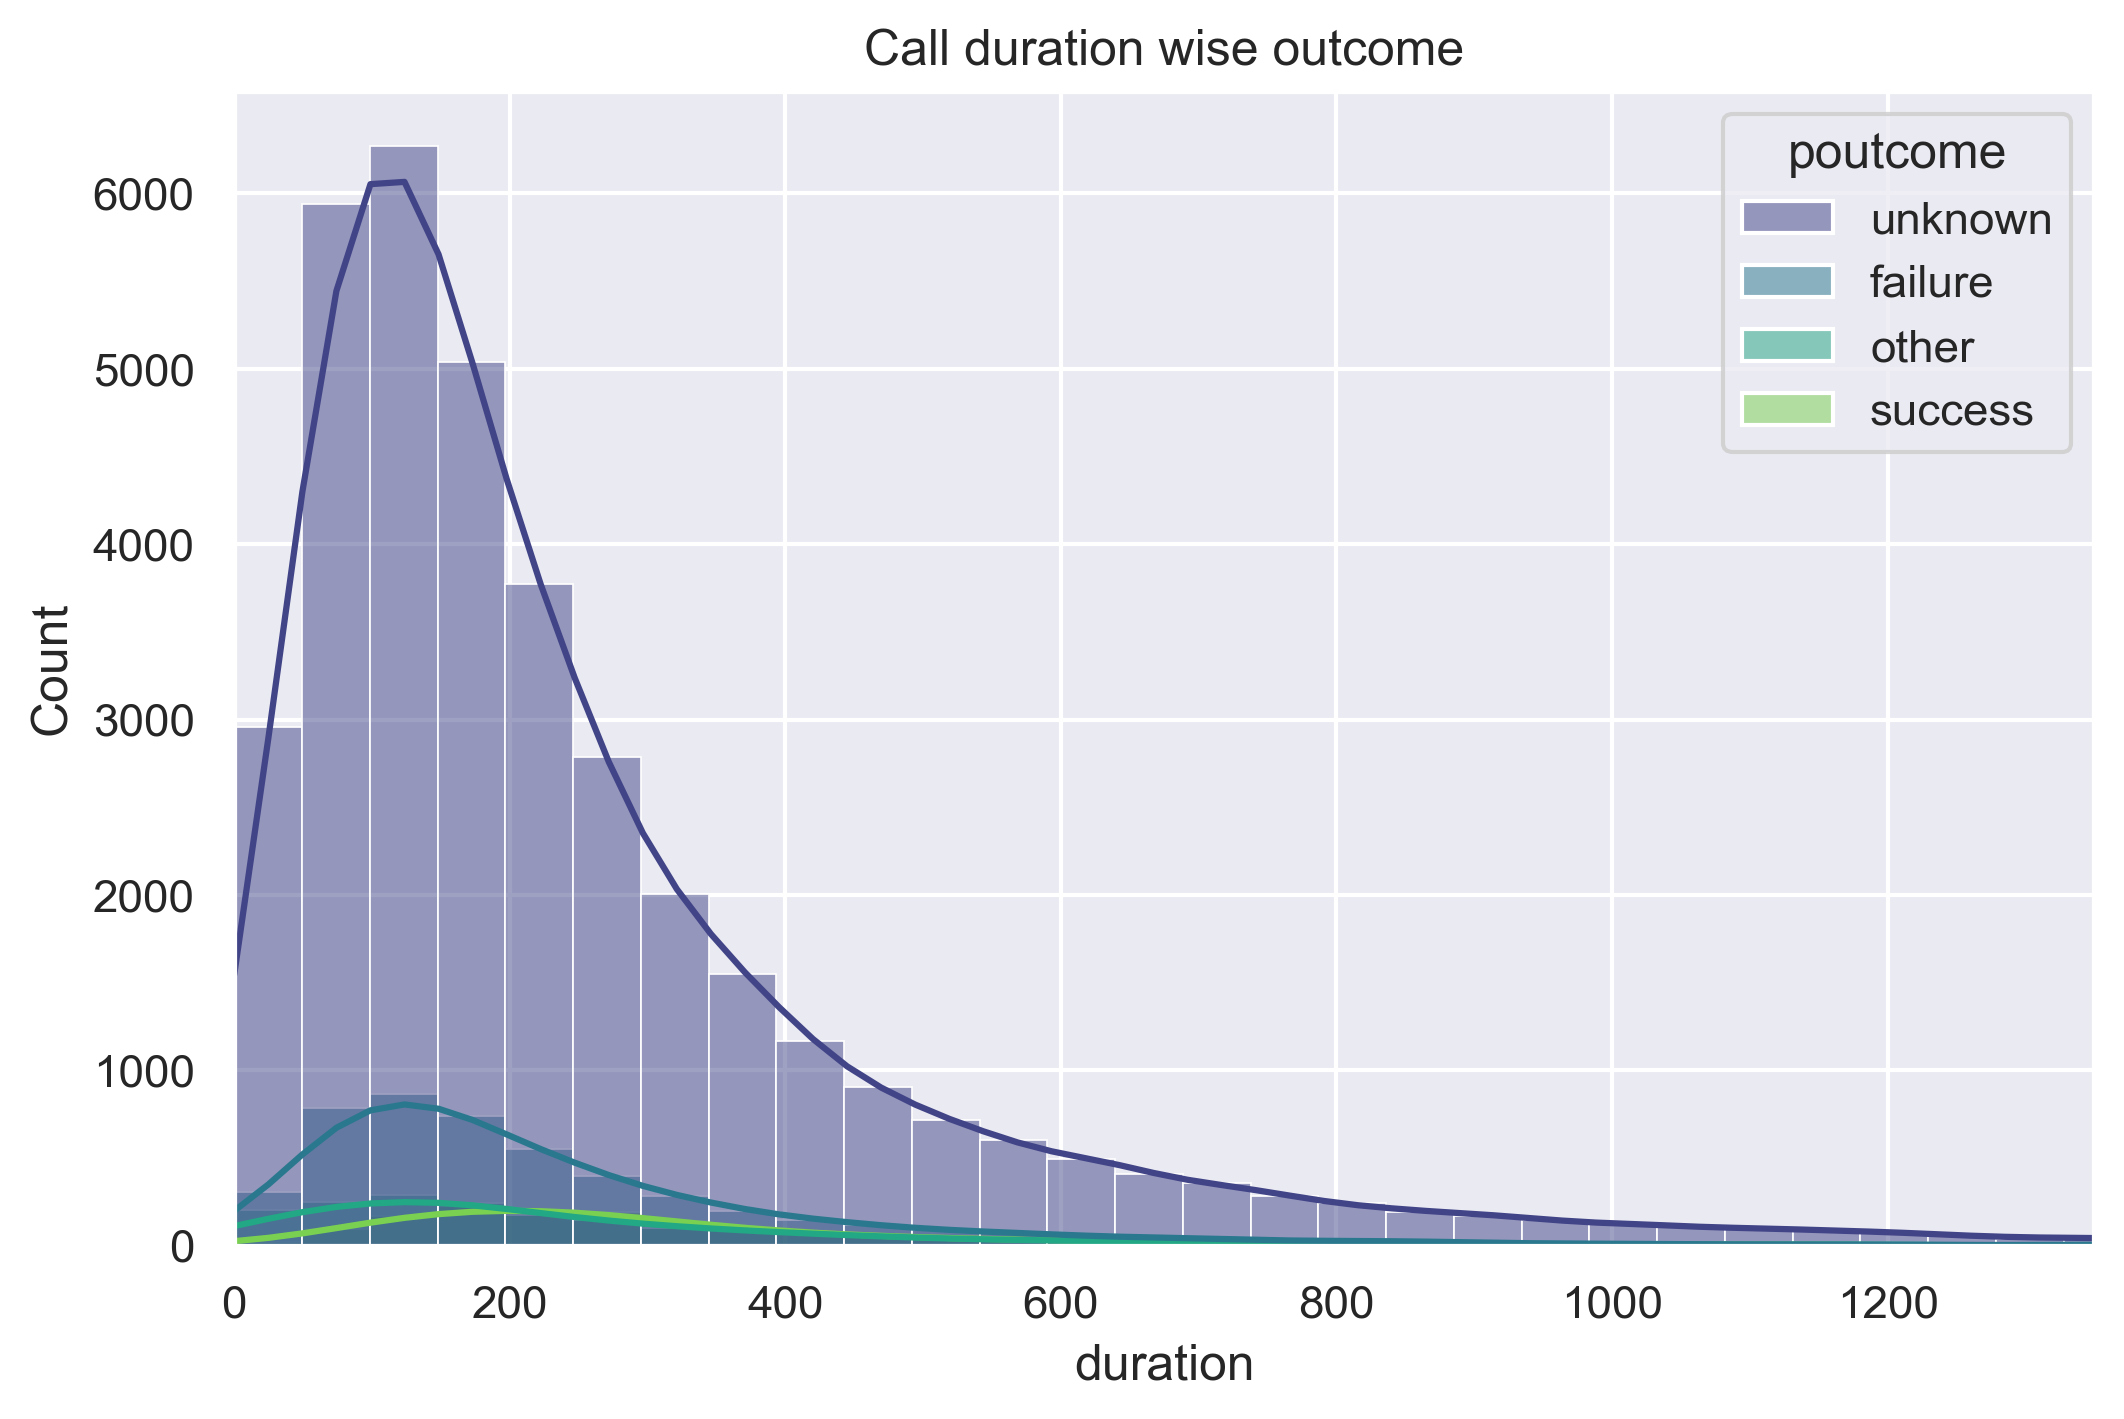

In [17]:
sns.histplot(data = df, x = 'duration', bins = 100, hue = 'poutcome', palette='viridis', kde='TRUE')
plt.title('Call duration wise outcome')
plt.xlim(0,1350)
plt.show()

* Most of the clients are doing blue collared jobs followed by technician, management, admin, etc
* the maximum outcome of campaign related to subscription of bank term deposit across all job categories is 'NO' not suscribed
* maximum number of clients have housing loans

* maximum number of clients have completed Secondary education

* most number of clients are married

* maximum clients do not have a credit default

* genrally housing loan is taken by clients within range of 30 to 40 years old

* very less number of clients have taken personal loan, the general age range is 30 to 50 for those who have taken any personal loan
* most of the call lasted around 200 seconds

# Data Encoding & Data Splititng

In [18]:
# splitting the data into feature and target variable
x = df.drop('y', axis = 1)
y = df['y']

In [19]:
# perfroming one-hot-encoding on features
x = pd.get_dummies(x)

# performing Label encoding on target column
le = LabelEncoder()
y = le.fit_transform(y)

In [20]:
x

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [22]:
# train test split of data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
3344,41,849,15,72,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
17965,49,1415,30,269,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18299,42,3842,31,130,4,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
10221,37,-119,11,375,11,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
32192,56,3498,15,264,2,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,44,1059,18,2093,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
44732,23,508,8,210,1,92,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
38158,34,1317,15,239,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
860,33,165,7,111,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [24]:
# scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
# creating a model instance
model  = LogisticRegression()

model.fit(x_train,y_train)

LogisticRegression()

In [26]:
# making predictions based on x_test
y_pred = model.predict(x_test)

In [27]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
# checking training and testing accuracy
print(f'Trianing Accuracy: {model.score(x_train,y_train)}')
print(f'Testing Accuracy: {model.score(x_test,y_test)}')

Trianing Accuracy: 0.902676399026764
Testing Accuracy: 0.8987061815769103


* As the training & testing Accuracy very similar therefore we can conclude that the model is performing in generalized way

In [29]:
# overall accuracy of model
accuracy_score(y_test,y_pred)

0.8987061815769103

<Axes: >

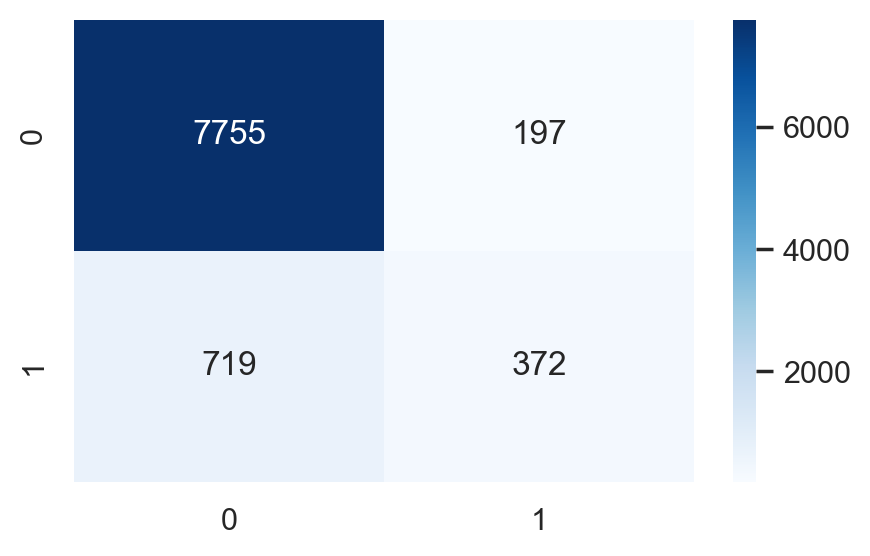

In [30]:
plt.figure(figsize=(5,3),dpi=200)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt = 'g',cmap = 'Blues')

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.94      7952
           1       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043



** Interpretation
* As the data is imbalanced we can't directly rely on just accuracy, therefore we check for Recall and precsision
* Recall and precision for 0 is very good as the count of 0's is much more than 1's, hence model can predict for 0 values with accuratly
* Recall and precision for 1's is poor due to imbalance in count of 1's and 0's